# **Agenda**

- **Apresentação & Introdução**
- **Porque Python? Vantagens e Desvantagens**
- **Uma jornada recorrente em projetos baseados em dados**
- **Exemplo de aplicação prática**
    - Explicação breve da biblioteca Pandas
    - Manipulação de dados
    - Exploração de dados

---

# **Introdução**


Contato:

- <font color="orange">Email</font> - castaldoniro@gmail.com
- <font color="orange">LinkedIn</font> - [linkedin.com/in/rodrigo-cabrera-castaldoni-575630181](linkedin.com/in/rodrigo-cabrera-castaldoni-575630181)



### O que é python? 

É uma linguagem de programação:

- Alto nível.
- Interpretada.
- Multi paradigma.
- Tipada dinâmicamente.

In [1]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


**PYPL: Popularity of Programming Language**: Quão frequentemente tutoriais sobre uma linguagem são buscados?
Ref: https://pypl.github.io/PYPL.html
<center><img src="figures/python2021_index.png"/></center>



- **Pypi**
  - 8.1 TB de código escrito.
  - 312,781 projetos.
  - <font color="orange">**518,479 usuários.**</font> 

---

# **Algumas diferenças entre python e outras linguagens**

Ref: https://www.python.org/doc/essays/comparisons/

Vamos printar na tela de 0 a 5?

**Java:**
```java
for (int i = 0; i < 5; i++) {
    System.out.println(i);
}
```

**Python:**

```python
for i in range(0,6):
    print(i)
```

In [2]:
# Qual posição dos números pares na lista? 
lista = [4, 5, 1, 2, 10, 7]
# R -> 0, 3, 4

In [3]:
# Qual posição dos números pares na lista? 

lista = [4, 5, 1, 2, 10, 7]
contador = 0
pares = []
for valor in lista:
    
    if valor%2 == 0:
        pares.append(contador)
    contador += 1
    
pares

[0, 3, 4]

In [4]:
# Precisamos mesmo de um contador?

lista = [4, 5, 1, 2, 10, 7]
pares = []
for idx, valor in enumerate(lista):
    
    if valor%2 == 0:
        pares.append(idx)

pares

[0, 3, 4]

In [5]:
# Precisamos inicializar a lista de pares?

lista = [4, 5, 1, 2, 10, 7]
pares = [idx for idx, valor in enumerate(lista) if valor%2==0]

pares

[0, 3, 4]

---

# **Uma jornada recorrente em projetos baseados em dados**

Cada projeto de ciência de dados é <font color = "orange">único</font>, contendo suas <font color = "orange">particularidades e especificidades</font>.

Mas, de maneira genérica, um projeto de ciência de dados costuma ser dividido nas seguintes etapas:

- 0) Formulação do problema;
- 1) Ingestão dos dados;
- 2) <font color = "orange"> **Preparação dos dados;** </font>
- 3) <font color = "orange"> **Exploração dos dados;** </font>
- 4) Modelagem;
- 5) Apresentação ou deploy;

Depois da etapa 0, as mais <font color="orange">trabalhosas</font> (e que comumente mais tomam tempo) são as etapas <font color="orange">2 e 3</font>.

E há quem diga que estas são as etapas mais importantes! <font color ="red"> **(Garbage in, garabage out!)** </font> 

<center><img src="https://www.xtivia.com/media/Data_Science_Pipeline.png" width=700></center>

# **Exemplo de aplicação prática**

Vamos explorar a relação entre consumo de energia e custo por submercado.

**Datasets** - https://www.ccee.org.br/portal/:
 - consumo.xlsx
 - infopld.xlsx (3 sheets)
 
**Informação auxiliar**:
 - estado2submercado.json (Mapeia estado - submercado)

DESENVOLVER INTELIGENCIA DE MERCADO E FERRAMENTAS COMPUTACIONAIS PARA SE DESCOBRI O VALOR DO PLD, POIS A PLD AJUDA A DEFINIR QUAL VAI SER A VERIAÇÃO NO BOLSA DE ENERGIA.


In [6]:
import numpy as np
import pandas as pd

# Vamos dar uma olhada em uma tabela
df = pd.read_excel("data/consumo/consumo.xlsx")
df.sample(10)

,Data,Estado,Consumo (MWm)
16045,NaN,Amazonas,1212.901235
8249,NaN,Espírito Santo,1510.305481
3608,NaN,Rio Grande do Sul,3964.634321
11864,NaN,Goiás,2317.366222
2909,NaN,São Paulo,15585.935253
8876,NaN,Mato Grosso,1113.700881
5529,NaN,Piauí,559.635831
12651,NaN,Paraná,4638.652569
440,NaN,Sergipe,463.879762
6931,NaN,Paraná,3286.229549


In [7]:
# Vamos resolver o problema das datas?
df["Data"] = df["Data"].fillna(method="ffill")

In [8]:
# O que vemos nem sempre é a verdade
print(pd.to_datetime(df.iloc[0,0]))
print(pd.to_datetime(df.iloc[0,0],dayfirst=True))

2018-01-07 00:00:00
2018-07-01 00:00:00


<AxesSubplot:>

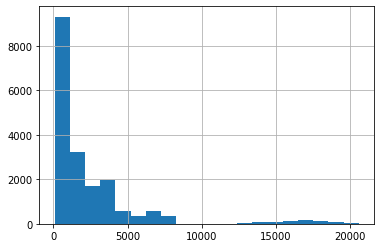

In [9]:
# Sera que a variável consumo está correta? 
df["Consumo (MWm)"].iloc[0]

# Vamos visualizar esse consumo?
df["Consumo (MWm)"].hist(bins=20)

In [10]:
# Para ganhar tempo eu ja limpei uma tabela
consumo_df = pd.read_csv("data/consumo/consumo_clean.csv")
consumo_df["Data"] = pd.to_datetime(consumo_df["Data"],dayfirst=True)

In [11]:
consumo_df

,Data,submercado,Consumo (MWm)
0,2018-07-01,nordeste,1186.785329
1,2018-07-01,norte,958.888612
2,2018-07-01,sudeste,3477.788493
3,2018-07-01,sul,3488.759033
4,2018-08-01,nordeste,1228.734591
...,...,...,...
91,2020-05-01,sul,3181.642659
92,2020-06-01,nordeste,1142.574824
93,2020-06-01,norte,1023.568751
94,2020-06-01,sudeste,3317.462027


## **Vamos fazer um mini processamento?** 

In [12]:
# Como podemos ler um arquivo excel com várias sheets?
infopld = pd.ExcelFile("data/infopld/infopld_pre_clean.xlsx")
infopld_2018_df = infopld.parse("sheet0")
infopld_2019_df = infopld.parse("sheet1")
infopld_2020_df = infopld.parse("sheet2")

In [13]:
# Eu gostaria de ter média do pld por submercado em um certo mês, essa é uma visão semanal ...
infopld_2018_df.sample(10)

,submercado,semana,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00,2018-05-01 00:00:00,2018-06-01 00:00:00,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00
13,sudeste,2,176.790000,179.750000,223.400000,85.060000,306.520000,442.340000,505.18,505.18,496.926667,326.100000,150.066667,66.156667
21,sul,4,192.076667,214.600000,219.693333,136.160000,341.423333,478.433333,505.18,505.18,442.283333,229.960000,119.333333,87.423333
17,sudeste,6,0.000000,0.000000,40.160000,0.000000,0.000000,505.180000,0.00,0.00,0.000000,0.000000,0.000000,0.000000
12,sudeste,1,196.546667,175.433333,202.220000,40.160000,218.216667,406.170000,505.18,505.18,487.806667,386.736667,142.690000,59.073333
18,sul,1,200.010000,151.490000,202.220000,40.160000,218.216667,406.170000,505.18,505.18,487.806667,386.736667,142.690000,59.073333
2,nordeste,3,162.106667,168.186667,236.266667,122.943333,165.950000,463.783333,505.18,505.18,492.430000,270.663333,121.036667,79.246667
16,sudeste,5,175.433333,202.220000,229.530000,218.216667,406.170000,505.180000,505.18,505.18,386.736667,142.690000,100.796667,137.750000
8,norte,3,142.390000,40.160000,40.160000,68.550000,115.010000,463.783333,505.18,505.18,492.430000,270.663333,121.036667,40.160000
7,norte,2,165.653333,40.160000,40.160000,77.946667,40.160000,321.060000,505.18,505.18,496.926667,326.100000,150.066667,66.156667
23,sul,6,0.000000,0.000000,40.160000,0.000000,0.000000,505.180000,0.00,0.00,0.000000,0.000000,0.000000,0.000000


In [14]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html
data_columns = infopld_2018_df.iloc[:,3:].columns
pivot_df = pd.pivot_table(infopld_2018_df, values = data_columns, index='submercado', aggfunc=np.mean, fill_value=0)
pivot_df.T

submercado,nordeste,norte,sudeste,sul
2018-02-01 00:00:00,149.291667,39.893889,156.578333,153.501111
2018-03-01 00:00:00,189.567222,40.160000,191.878333,191.878333
2018-04-01 00:00:00,93.433889,44.496111,100.423333,100.423333
2018-05-01 00:00:00,176.266667,129.660000,266.565000,266.565000
2018-06-01 00:00:00,442.397778,442.397778,468.448333,468.448333
2018-07-01 00:00:00,420.983333,420.983333,420.983333,420.983333
2018-08-01 00:00:00,420.983333,420.983333,420.983333,420.983333
2018-09-01 00:00:00,384.363889,384.815000,384.363889,384.363889
2018-10-01 00:00:00,226.025556,226.025556,226.025000,226.025000
2018-11-01 00:00:00,105.654444,105.654444,105.653889,105.653889


In [15]:
# Vamos fazer uma função?
def pivot_data_columns(df):

    data_columns = df.iloc[:,3:].columns
    return pd.pivot_table(df, values = data_columns, index='submercado', aggfunc=np.mean, fill_value=0).T

infopld_2018_df = pivot_data_columns(infopld_2018_df)
infopld_2019_df = pivot_data_columns(infopld_2019_df)
infopld_2020_df = pivot_data_columns(infopld_2020_df)

In [16]:
# Como podemos juntar esses dataframes?
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html
analysis_df = pd.concat([infopld_2018_df, infopld_2019_df, infopld_2020_df])

# Algumas manipulações
analysis_df = analysis_df.reset_index()\
                         .rename(columns={"index":"Data"})

In [17]:
# Como criar uma coluna submercado sem perder informação
# https://pandas.pydata.org/docs/reference/api/pandas.melt.html
analysis_melt_df = analysis_df.melt(id_vars="Data",value_name="pld")
analysis_melt_df.head()

,Data,submercado,pld
0,2018-02-01,nordeste,149.291667
1,2018-03-01,nordeste,189.567222
2,2018-04-01,nordeste,93.433889
3,2018-05-01,nordeste,176.266667
4,2018-06-01,nordeste,442.397778


In [18]:
# Essa tabela tem datas tbm
consumo_df.head()

,Data,submercado,Consumo (MWm)
0,2018-07-01,nordeste,1186.785329
1,2018-07-01,norte,958.888612
2,2018-07-01,sudeste,3477.788493
3,2018-07-01,sul,3488.759033
4,2018-08-01,nordeste,1228.734591


**Como podemos juntar essas tabelas?**

<center><img src="figures/inner_join.png" width=200px/></center>

In [19]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html
analysis_merge_df = pd.merge(analysis_melt_df, consumo_df, on=["Data","submercado"])
analysis_merge_df.head(5)

,Data,submercado,pld,Consumo (MWm)
0,2018-07-01,nordeste,420.983333,1186.785329
1,2018-08-01,nordeste,420.983333,1228.734591
2,2018-09-01,nordeste,384.363889,1249.071013
3,2018-10-01,nordeste,226.025556,1318.491708
4,2018-11-01,nordeste,105.654444,1325.104644


In [20]:
analysis_merge_df.head(5)

,Data,submercado,pld,Consumo (MWm)
0,2018-07-01,nordeste,420.983333,1186.785329
1,2018-08-01,nordeste,420.983333,1228.734591
2,2018-09-01,nordeste,384.363889,1249.071013
3,2018-10-01,nordeste,226.025556,1318.491708
4,2018-11-01,nordeste,105.654444,1325.104644


## **Análise Qualitativa**

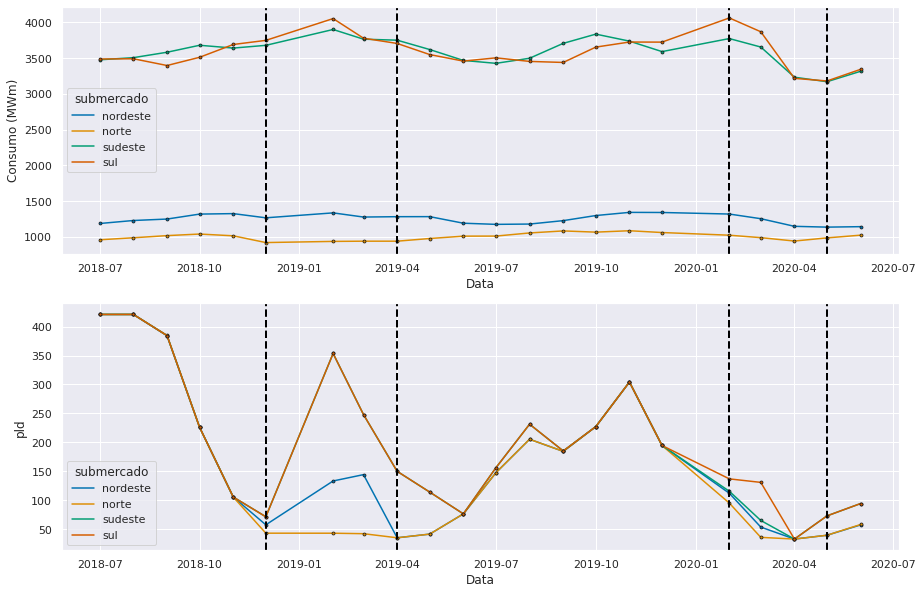

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")
color1 = "ch:rot=-.25,hue=1,light=.75"
color2 = "colorblind"

fig, axs = plt.subplots(2,1,figsize=(15,10))

sns.lineplot(
    x="Data", y="Consumo (MWm)",hue="submercado",
    data=analysis_merge_df, ax = axs[0],
    palette=color2, marker='o', markersize=3, mec='k', lw=1.5)

axs[0].axvline(x=pd.to_datetime("2018-12-1"), lw=2, ls='--', c='black')
axs[0].axvline(x=pd.to_datetime("2019-04-1"), lw=2, ls='--', c='black')

axs[0].axvline(x=pd.to_datetime("2020-02-1"), lw=2, ls='--', c='black')
axs[0].axvline(x=pd.to_datetime("2020-05-1"), lw=2, ls='--', c='black')


sns.lineplot(
    x="Data", y="pld", hue ="submercado", 
    data=analysis_merge_df, ax = axs[1],
    palette=color2, marker='o', markersize=3, mec='k', lw=1.5)

axs[1].axvline(x=pd.to_datetime("2018-12-1"), lw=2, ls='--', c='black')
axs[1].axvline(x=pd.to_datetime("2019-04-1"), lw=2, ls='--', c='black')

axs[1].axvline(x=pd.to_datetime("2020-02-1"), lw=2, ls='--', c='black')
axs[1].axvline(x=pd.to_datetime("2020-05-1"), lw=2, ls='--', c='black')

plt.show()

---

## **Análise Quantitativa**

In [22]:
quant_analysis_df = analysis_merge_df.copy()

In [23]:
quant_analysis_df.describe()

,pld,Consumo (MWm)
count,88.000000,88.000000
mean,176.890107,2359.999704
std,122.581966,1253.152227
min,33.066667,920.038922
25%,73.118056,1123.363972
50%,148.868611,2256.838563
75%,228.311736,3599.759421
max,420.983333,4063.799468


In [24]:
quant_analysis_df.corr()

,pld,Consumo (MWm)
pld,1.000000,0.174967
Consumo (MWm),0.174967,1.000000


In [25]:
quant_analysis_df.groupby("submercado").corr()

pld  Consumo (MWm)
submercado                                       
nordeste   pld            1.000000       0.121177
           Consumo (MWm)  0.121177       1.000000
norte      pld            1.000000       0.403104
           Consumo (MWm)  0.403104       1.000000
sudeste    pld            1.000000       0.301478
           Consumo (MWm)  0.301478       1.000000
sul        pld            1.000000       0.158202
           Consumo (MWm)  0.158202       1.000000

In [26]:
quant_analysis_df = quant_analysis_df.set_index("Data")

In [27]:
quant_analysis_df.groupby(['submercado', pd.Grouper(freq='Y')]).corr()

pld  Consumo (MWm)
submercado Data                                             
nordeste   2018-12-31 pld            1.000000      -0.731031
                      Consumo (MWm) -0.731031       1.000000
           2019-12-31 pld            1.000000       0.235194
                      Consumo (MWm)  0.235194       1.000000
           2020-12-31 pld            1.000000       0.847248
                      Consumo (MWm)  0.847248       1.000000
norte      2018-12-31 pld            1.000000       0.208567
                      Consumo (MWm)  0.208567       1.000000
           2019-12-31 pld            1.000000       0.924807
                      Consumo (MWm)  0.924807       1.000000
           2020-12-31 pld            1.000000       0.751189
                      Consumo (MWm)  0.751189       1.000000
sudeste    2018-12-31 pld            1.000000      -0.867868
                      Consumo (MWm) -0.867868       1.000000
           2019-12-31 pld            1.000000       0.654744
                      Consumo (MWm)  0.654744       1.000000
           2020-12-31 pld            1.000000       0.547205
                      Consumo (MWm)  0.547205       1.000000
sul        2018-12-31 pld            1.000000      -0.897797
                      Consumo (MWm) -0.897797       1.000000
           2019-12-31 pld            1.000000       0.725798
                      Consumo (MWm)  0.725798       1.000000
           2020-12-31 pld            1.000000       0.889989
                      Consumo (MWm)  0.889989       1.000000

In [28]:
(quant_analysis_df.groupby(['submercado', pd.Grouper(freq='Y')])
                 .corr()
                 .unstack('submercado')
                 .filter(like="pld")
                 .filter(like="Consumo (MWm)",axis=0))

pld                              
submercado                nordeste     norte   sudeste       sul
Data                                                            
2018-12-31 Consumo (MWm) -0.731031  0.208567 -0.867868 -0.897797
2019-12-31 Consumo (MWm)  0.235194  0.924807  0.654744  0.725798
2020-12-31 Consumo (MWm)  0.847248  0.751189  0.547205  0.889989

In [29]:
stats = ["mean"]

cm = sns.light_palette("orange", as_cmap=True)

(quant_analysis_df.groupby(['submercado', pd.Grouper(freq='Y')])
                  .agg({"pld":stats, "Consumo (MWm)":stats})
                  .unstack('submercado')
                  .style.background_gradient(cmap=cm)
)